In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [13]:
path = 'ASTROSFINAL.csv'

In [14]:
df = pd.read_csv(path)

In [15]:
df.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,Friday,Jan,0,No Game,No game
1,2010-01-02,13,Saturday,Jan,14,No Game,No game
2,2010-01-03,12,Sunday,Jan,0,No Game,No game
3,2010-01-04,9,Monday,Jan,14,No Game,No game
4,2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [16]:
df.drop(['date'], axis=1, inplace=True)

In [17]:
dft = df.copy()
dft.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
0,18,Friday,Jan,0,No Game,No game
1,13,Saturday,Jan,14,No Game,No game
2,12,Sunday,Jan,0,No Game,No game
3,9,Monday,Jan,14,No Game,No game
4,8,Tuesday,Jan,2,No Game,No game


# Dummy

In [18]:
dft = pd.get_dummies(dft,drop_first=True)

In [19]:
dft.head()

,sum_crimes,mode_hr,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_Aug,month_Dec,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,game_No Game,game_Won Game,seasons_Playoffs,seasons_Regular
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13,14,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Split game, no game

In [ ]:
no_game = dft.game == 'No Game'

game = dft[~no_game]
nogame = dft[no_game]

In [ ]:
game = pd.get_dummies(game)

In [20]:
game = dft.copy()

In [21]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 23 columns):
sum_crimes           2917 non-null int64
mode_hr              2917 non-null int64
weekday_Monday       2917 non-null uint8
weekday_Saturday     2917 non-null uint8
weekday_Sunday       2917 non-null uint8
weekday_Thursday     2917 non-null uint8
weekday_Tuesday      2917 non-null uint8
weekday_Wednesday    2917 non-null uint8
month_Aug            2917 non-null uint8
month_Dec            2917 non-null uint8
month_Feb            2917 non-null uint8
month_Jan            2917 non-null uint8
month_Jul            2917 non-null uint8
month_Jun            2917 non-null uint8
month_Mar            2917 non-null uint8
month_May            2917 non-null uint8
month_Nov            2917 non-null uint8
month_Oct            2917 non-null uint8
month_Sep            2917 non-null uint8
game_No Game         2917 non-null uint8
game_Won Game        2917 non-null uint8
seasons_Playoffs     2917 non-nu

## TEST

In [22]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ mode_hr',game).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     86.32
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           2.91e-20
Time:                        22:40:58   Log-Likelihood:                -8080.1
No. Observations:                2917   AIC:                         1.616e+04
Df Residuals:                    2915   BIC:                         1.618e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3056      0.121     60.266      0.0

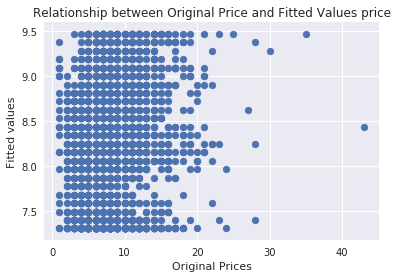

In [24]:

# your turn# your t 
plt.scatter(game.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

## sklearn

In [25]:
X = game.drop('sum_crimes', axis=1)
y = game['sum_crimes']

In [26]:
from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
lm = LinearRegression()


lm.fit(X,y)
prediction = lm.predict(X)

In [27]:

# The coefficients# The co 
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,mode_hr,0.094950
1,weekday_Monday,-1.415035
2,weekday_Saturday,0.861554
3,weekday_Sunday,-0.281913
4,weekday_Thursday,-1.092348
5,weekday_Tuesday,-1.454109
6,weekday_Wednesday,-1.546885
7,month_Aug,0.530504
8,month_Dec,0.405158
9,month_Feb,-0.156058


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


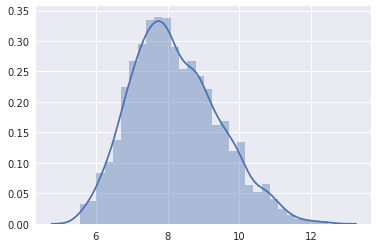

In [28]:
sns.distplot(lm.predict(X))

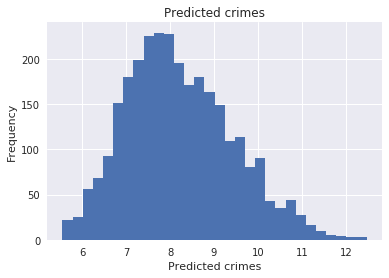

In [29]:

# your turn
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted crimes")
plt.xlabel("Predicted crimes")
plt.ylabel("Frequency")
plt.show()

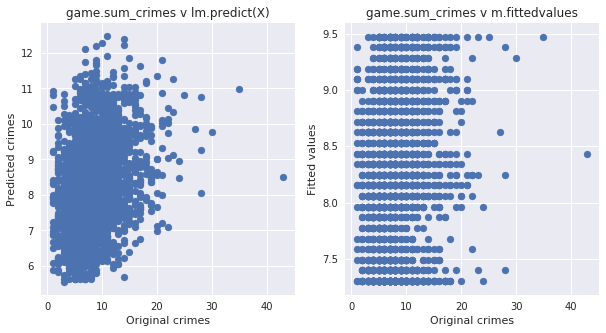

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1 = axes.flatten()

ax0.scatter(y, lm.predict(X))
ax0.set_xlabel("Original crimes")
ax0.set_ylabel("Predicted crimes")
ax0.set_title('game.sum_crimes v lm.predict(X)')
ax1.set_title('game.sum_crimes v m.fittedvalues')
ax1.scatter(y,m.fittedvalues)
ax1.set_xlabel("Original crimes")
ax1.set_ylabel("Fitted values")
plt.show()

In [31]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((y - prediction) ** 2)
ESS = np.sum(prediction - np.mean(y)) ** 2
R_sq = lm.score(X, y)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 40475.30508647926
Explained Sum-of-Squares ESS      : 1.4249478520933016e-24
Coefficient of Determination R-sq : 0.09625555426981391


In [32]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.05581660372003305
Root Mean Squared Error: 3.6315147940087638


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.05581660372003305

In [34]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# regressor, feature data, target data, number of folds
#returns an array of cross-validaiton scores, 
cv_results = cross_val_score(reg,X,y,cv=5)
# the length of the array is the number of folts utilized
print(cv_results)  # R square, default score of linear regression

[0.00585341 0.07128074 0.05618215 0.10641797 0.00392747]


In [35]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.00585341 0.07128074 0.05618215 0.10641797 0.00392747]
Average 5-Fold CV Score: 0.04873234715787269


In [36]:

# Import necessary modules# Import 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.053557194289392984
0.020765292515511524


In [37]:
from sklearn.linear_model import Ridge

X_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)  # normalized=true all our variables are on teh same scale 

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.057359944131110896

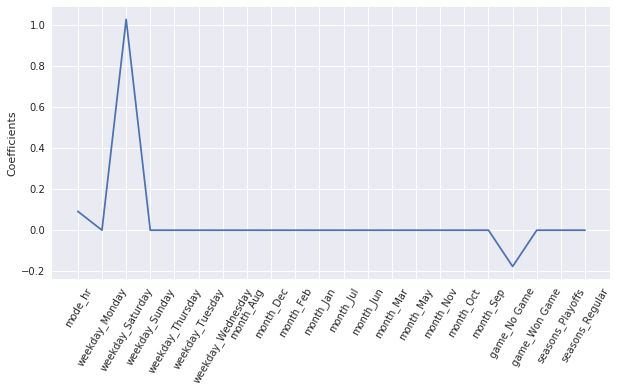

In [38]:
from sklearn.linear_model import Lasso
X = game.drop('sum_crimes', axis=1).values
y = game['sum_crimes'].values
names = game.drop('sum_crimes', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
fig,ax = plt.subplots(figsize=(10,5))
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')


plt.show()

[ 0. -0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.
 -0.  0.  0.  0.]


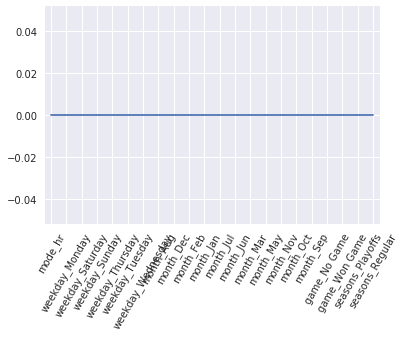

In [39]:
df_columns = game.drop('sum_crimes', axis=1).columns

# Import Lasso# Import 
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()

In [40]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


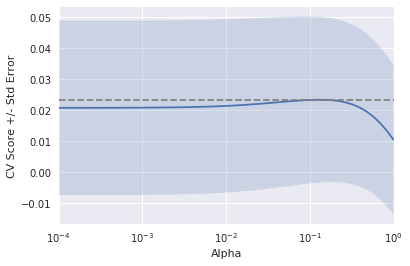

In [41]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [ ]:
dft.game.unique()
nogame = dft.game == 'No Game'

In [ ]:
dft = dft[~nogame]

In [42]:
X_rooms = dft.mode_hr.values
X_rooms = X_rooms.reshape(-1,1)
X_rooms.shape

(2917, 1)

In [43]:
y = dft['sum_crimes'].values
y = y.reshape(-1,1)
y.shape

(2917, 1)

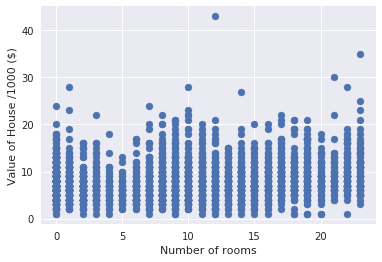

In [44]:

plt.scatter(X_rooms, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

0.02876058405461301


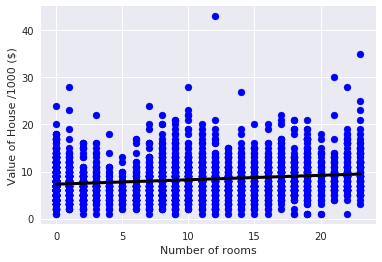

In [45]:
# import libraries
import numpy as np
from sklearn import linear_model


# instatiate LinearRegression as regr
reg = linear_model.LinearRegression()

# fit the regression to the data using `.fit()`
reg.fit(X_rooms, y)

#  check out the regdression predictions over the range of the data
# using np.linspace  betw max & min  num of rooms
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1,1)
# plot

print(reg.score(X_rooms, y))

plt.scatter(X_rooms, y, color='blue')

plt.plot(prediction_space, reg.predict(prediction_space),
        color='black',
        linewidth=3)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=5)